<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Ensembles and Random Forests
 
_Author: Joseph Nelson (DC)_

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

---

## Learning Objectives

Students will be able to:

- Understand how and why decision trees can be improved using bagging and random forests.
- Build random forest models for classification and regression.
- Know how to extract the most important predictors in a random forest model.


## Lesson Guide
- [Introduction](#introduction)
- [Part 1: Manual Ensembling](#part-one)
- [Part 2: Bagging](#part-two)
    - [Manually Implementing Bagged Decision Trees](#manual-bagged)
    - [Bagged Decision Trees in `scikit-learn`](#manual-sklearn)
    - [Estimating Out-of-Sample Error](#oos-error)
    
    
- [Part 3: Random Forests](#part-three)
- [Part 4: Building and Tuning Decision Trees and Random Forests](#part-four)
    - [Optional: Predicting Salary With a Decision Tree](#decision-tree)
    - [Predicting Salary With a Random Forest](#random-forest-demo)
    - [Comparing Random Forests With Decision Trees](#comparing)
    
    
- [Optional: Tuning Individual Parameters](#tuning)
- [Summary](#summary)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

<a id="introduction"></a>
## Introduction

### What is Ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model. For example, given predictions from several models we could:

- **Regression:** Take the average of the predictions.
- **Classification:** Take a vote and use the most common prediction.

For ensembling to work well, the models must be:

- **Accurate:** They outperform the null model.
- **Independent:** Their predictions are generated using different processes.

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when you average the models.

There are two basic **methods for ensembling:**

- Manually ensembling your individual models.
- Using a model that ensembles for you.

<a id="part-one"></a>
## Part 1: Manual Ensembling

What makes an effective manual ensemble?

- Different types of **models**.
- Different combinations of **features**.
- Different **tuning parameters**.

![Machine learning flowchart](assets/crowdflower_ensembling.jpg)

*Machine learning flowchart created by the [winner](https://github.com/ChenglongChen/Kaggle_CrowdFlower) of Kaggle's [CrowdFlower competition](https://www.kaggle.com/c/crowdflower-search-relevance)*.

### Comparing Manual Ensembling With a Single Model Approach

**Advantages of manual ensembling:**

- It increases predictive accuracy.
- It's easy to get started.

**Disadvantages of manual ensembling:**

- It decreases interpretability.
- It takes longer to train.
- It takes longer to predict.
- It is more complex to automate and maintain.
- Small gains in accuracy may not be worth the added complexity.

<a id="part-two"></a>
## Part 2: Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially because of **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general-purpose procedure for reducing the variance of a machine learning method but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

A **bootstrap sample** is a random sample with replacement. So, it has the same size as the original sample but might duplicate some of the original observations.

In [ ]:
# Set a seed for reproducibility.
np.random.seed(1)

# Create an array of 1 through 20.
nums = np.arange(1, 21)
print(nums)

# Sample that array 20 times with replacement.
print(np.random.choice(a=nums, size=20, replace=True))

**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**.
    - Take a vote for **classification trees**.

Notes:

- **Each bootstrap sample** should be the same size as the original training set. (It may contain repeated rows.)
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

<a id="manual-bagged"></a>
## Manually Implementing Bagged Decision Trees (with B=10)

In [2]:
# Read in and prepare the vehicle training data.
import pandas as pd

path = './data/vehicles_train.csv'
train = pd.read_csv(path)
train['vtype'] = train.vtype.map({'car':0, 'truck':1})
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


In [ ]:
# Set a seed for reproducibility.
np.random.seed(123)

# Create ten bootstrap samples (which will be used to select rows from the DataFrame).


In [ ]:
# Show the rows for the first decision tree.


In [ ]:
# Read in and prepare the vehicle testing data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Grow each tree deep.

# List for storing predicted price from each tree:

# Define testing data.

# Grow one tree for each bootstrap sample and make predictions on testing data.

# Convert predictions from list to NumPy array.


In [ ]:
# Average predictions.


In [ ]:
# Calculate RMSE.


<a id="manual-sklearn"></a>
## Bagged Decision Trees in `scikit-learn` (with B=500)

In [3]:
# Define the training and testing sets.

path = './data/vehicles_test.csv'
test = pd.read_csv(path)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [22]:
import sklearn.tree
dtr = sklearn.tree.DecisionTreeRegressor(max_depth=2, 
                            max_features=3,
                            min_samples_leaf=1)
feature_cols = ['year', 'miles', 'doors', 'vtype']
dtr.fit(train[feature_cols], train.price)
sklearn.metrics.mean_squared_error(test.price,
                                   dtr.predict(test[feature_cols]))

1630208.3333333333

In [21]:
# Instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator."
import sklearn.ensemble
bag = sklearn.ensemble.BaggingRegressor(
    sklearn.tree.DecisionTreeRegressor(max_depth=2, max_features=3,
                                       min_samples_leaf=1),
    n_estimators=5,
    max_features=4
)
bag.fit(train[feature_cols], train.price)
sklearn.metrics.mean_squared_error(test.price,
                                   bag.predict(test[feature_cols]))

475426.02880658436

In [25]:
import sys
sklearn.tree.export_graphviz(bag.estimators_[0],
                             sys.stdout,
                             feature_names=feature_cols)

digraph Tree {
node [shape=box] ;
0 [label="miles <= 98750.0\nmse = 25123520.408\nsamples = 8\nvalue = 6792.857"] ;
1 [label="year <= 2005.5\nmse = 10000000.0\nsamples = 3\nvalue = 12000.0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 0.0\nsamples = 1\nvalue = 5000.0"] ;
1 -> 2 ;
3 [label="mse = 240000.0\nsamples = 2\nvalue = 13400.0"] ;
1 -> 3 ;
4 [label="miles <= 143500.0\nmse = 878593.75\nsamples = 5\nvalue = 2887.5"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 0.0\nsamples = 1\nvalue = 4000.0"] ;
4 -> 5 ;
6 [label="mse = 217600.0\nsamples = 4\nvalue = 2220.0"] ;
4 -> 6 ;
}

In [26]:
sklearn.tree.export_graphviz(bag.estimators_[1],
                             sys.stdout,
                             feature_names=feature_cols)

digraph Tree {
node [shape=box] ;
0 [label="miles <= 105750.0\nmse = 23150867.347\nsamples = 8\nvalue = 6235.714"] ;
1 [label="year <= 2008.5\nmse = 13346938.776\nsamples = 4\nvalue = 10285.714"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 3555555.556\nsamples = 2\nvalue = 6333.333"] ;
1 -> 2 ;
3 [label="mse = 187500.0\nsamples = 2\nvalue = 13250.0"] ;
1 -> 3 ;
4 [label="vtype <= 0.5\nmse = 149795.918\nsamples = 4\nvalue = 2185.714"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 0.0\nsamples = 1\nvalue = 3000.0"] ;
4 -> 5 ;
6 [label="mse = 45833.333\nsamples = 3\nvalue = 2050.0"] ;
4 -> 6 ;
}

In [ ]:
# Fit and predict.


In [ ]:
# Calculate RMSE.


<a id="oos-error"></a>
## Estimating Out-of-Sample Error

For bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validation**!

For each tree, the **unused observations** are called "out-of-bag" observations.

In [ ]:
# Show the first bootstrap sample.


In [ ]:
# Show the "in-bag" observations for each sample.


In [ ]:
# Show the "out-of-bag" observations for each sample.


**Calculating "out-of-bag error:"**

1. For each observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [ ]:
# Compute the out-of-bag R-squared score (not MSE, unfortunately) for B=500.


### Estimating Feature Importance

Bagging increases **predictive accuracy** but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** Calculate the total amount that **MSE** decreases due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** Calculate the total amount that **Gini index** decreases due to splits over a given feature, averaged over all trees

<a id="part-three"></a>
## Part 3: Random Forests

Random Forests offer a **slight variation on bagged trees** with even better performance:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **random forests "decorrelate" the trees** to the extent that the averaging process can reduce the variance of the resulting model.
- Another way of looking at it is that sometimes one or two strong features dominate every tree in bagging, resulting in essentially the same tree as every predictor. (This is what was meant when saying the trees could be highly correlated.) By using a subset of features to generate each tree, we get a wider variety of predictive trees that do not all use the same dominant features.

<a id="part-four"></a>
## Part 4: Building and Tuning Decision Trees and Random Forests

In this section, we will implement random forests in scikit-learn.

- Major League Baseball player data from 1986-87: [data](https://github.com/justmarkham/DAT8/blob/master/data/hitters.csv), [data dictionary](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) (page 7)
- Each observation represents a player.
- **Goal:** Predict player salary.

### Preparing the Data

In [28]:
# Read in the data.
path ='./data/hitters.csv'
hitters = pd.read_csv(path)

In [29]:
hitters.sample(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
152,278,86,4,33,38,45,1,278,86,4,33,38,45,N,W,102,4,2,110.000,N
119,327,85,3,30,44,20,8,2140,568,16,216,208,93,A,E,91,185,12,362.500,A
288,368,103,3,48,28,54,8,1897,493,9,207,162,198,N,W,209,246,3,326.667,N
233,540,135,30,82,88,55,1,540,135,30,82,88,55,A,W,157,6,14,172.000,A
210,317,88,3,40,32,19,8,2543,715,28,269,270,118,A,W,220,16,4,NaN,A


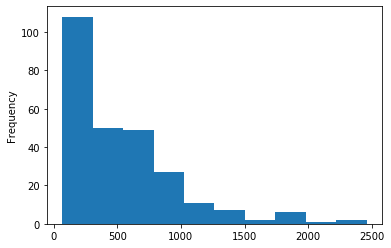

In [31]:
hitters.Salary.plot.hist()

In [34]:
hitters.Salary

0           NaN
1       475.000
2       480.000
3       500.000
4        91.500
5       750.000
6        70.000
7       100.000
8        75.000
9      1100.000
10      517.143
11      512.500
12      550.000
13      700.000
14      240.000
15          NaN
16      775.000
17      175.000
18          NaN
19      135.000
20      100.000
21      115.000
22          NaN
23      600.000
24      776.667
25      765.000
26      708.333
27      750.000
28      625.000
29      900.000
         ...   
292         NaN
293     925.000
294     185.000
295     920.000
296     286.667
297     245.000
298         NaN
299     235.000
300    1150.000
301     160.000
302         NaN
303     425.000
304     900.000
305         NaN
306     500.000
307     277.500
308     750.000
309     160.000
310    1300.000
311     525.000
312     550.000
313    1600.000
314     120.000
315     165.000
316         NaN
317     700.000
318     875.000
319     385.000
320     960.000
321    1000.000
Name: Salary, Length: 32

In [38]:
# Remove rows with missing values.
hitters = hitters.dropna()
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,log_salary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.000,A,6.620073
6,185,37,1,23,8,21,2,214,42,1,...,9,24,N,E,76,127,7,70.000,A,4.248495
7,298,73,0,24,24,7,3,509,108,0,...,37,12,A,W,121,283,9,100.000,A,4.605170
8,323,81,6,26,32,8,2,341,86,6,...,34,8,N,W,143,290,19,75.000,N,4.317488
9,401,92,17,49,66,65,13,5206,1332,253,...,890,866,A,E,0,0,0,1100.000,A,7.003065
10,574,159,21,107,75,59,10,4631,1300,90,...,504,488,A,E,238,445,22,517.143,A,6.248319


In [35]:
import fitter
f = fitter.Fitter(hitters.Salary[hitters.Salary.notnull()])
f.fit()

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:390: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted alpha distribution with error=2.027673875876026e-05)
Fitted anglit distribution with error=3.315622504671581e-05)
Fitted arcsine distribution with error=2.690955144707365e-05)
Fitted argus distribution with error=4.423540650269121e-05)
Fitted beta distribution with error=7.283887216372234e-06)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=1.344753838363488e-05)
Fitted bradford distribution with error=1.9940660907461712e-05)
Fitted burr distribution with error=1.456976789070401e-05)
Fitted burr12 distribution with error=2.8896751876674344e-05)
Fitted cauchy distribution with error=2.2902477137769465e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:847: RuntimeWarning: overflow encountered in power
  return np.log(c) + np.log(d) + sc.xlogy(c - 1, x) + sc.xlog1py(-d-1, x**c)


Fitted chi distribution with error=6.718701998661881e-06)
Fitted chi2 distribution with error=4.3927976740952484e-05)
Fitted cosine distribution with error=2.9659973478120297e-05)
Fitted crystalball distribution with error=2.610945483583504e-05)
Fitted dgamma distribution with error=1.9929606825605022e-05)
Fitted dweibull distribution with error=2.0294254731515154e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.05.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0333333333333332.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0555555555555554.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.083333333333333.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anac

Fitted erlang distribution with error=5.0968693489698654e-05)
Fitted expon distribution with error=8.825827173848764e-06)
Fitted exponnorm distribution with error=8.826533307165451e-06)
Fitted exponpow distribution with error=6.8816244352890425e-06)
Fitted exponweib distribution with error=9.321665335883316e-06)
Fitted f distribution with error=1.335490253526225e-05)
Fitted fatiguelife distribution with error=1.1525883540374397e-05)
Fitted fisk distribution with error=1.2860611307095261e-05)
Fitted foldcauchy distribution with error=1.0965391661271853e-05)
Fitted foldnorm distribution with error=1.3096576644201552e-05)
Fitted frechet_l distribution with error=6.484953632816667e-05)
Fitted frechet_r distribution with error=2.942815157496747e-05)
Fitted gamma distribution with error=7.322839426755983e-06)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3175: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=6.995681759111162e-06)
Fitted genexpon distribution with error=8.825826387149679e-06)
Fitted genextreme distribution with error=1.5193797509177192e-05)
Fitted gengamma distribution with error=9.921618706787926e-06)
Fitted genhalflogistic distribution with error=1.1705577629949288e-05)
Fitted genlogistic distribution with error=1.8399464428340455e-05)
Fitted gennorm distribution with error=2.227037650094021e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genpareto distribution with error=8.99188393900518e-06)
Fitted gilbrat distribution with error=1.2827977005985382e-05)
Fitted gompertz distribution with error=8.97623649337446e-06)
Fitted gumbel_l distribution with error=2.91465769568885e-05)
Fitted gumbel_r distribution with error=1.8406190137772446e-05)
Fitted halfcauchy distribution with error=1.006434495339411e-05)
Fitted halfgennorm distribution with error=1.767319722098648e-05)
Fitted halflogistic distribution with error=1.1645244595586487e-05)
Fitted halfnorm distribution with error=1.3139910911824568e-05)
Fitted hypsecant distribution with error=2.1478843662739187e-05)
Fitted invgamma distribution with error=1.4848286252840886e-05)
Fitted invgauss distribution with error=1.30637303323397e-05)
Fitted invweibull distribution with error=1.5193970198329072e-05)
Fitted johnsonsb distribution with error=9.290270110678352e-06)
Fitted johnsonsu distribution with error=1.2894591676530255e-05)
Fitted kappa3 distribution with error

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


Fitted ksone distribution with error=nan)
Fitted kstwobign distribution with error=1.8277649563206006e-05)
Fitted laplace distribution with error=2.3367888997837972e-05)
Fitted levy distribution with error=1.238374524193717e-05)
Fitted levy_l distribution with error=4.659140545143609e-05)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=2.243155033786857e-05)
Fitted logistic distribution with error=2.1341407897397273e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4299: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted loglaplace distribution with error=1.869531105672763e-05)
Fitted lognorm distribution with error=1.2843758855958542e-05)
Fitted lomax distribution with error=8.775461918633468e-06)
Fitted maxwell distribution with error=2.04918636926038e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1618: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1618: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


Fitted mielke distribution with error=1.4586291895069976e-05)
Fitted moyal distribution with error=1.7115806355930782e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5014: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted nakagami distribution with error=7.459617645099283e-06)
Fitted ncf distribution with error=2.4180842207748863e-05)
Fitted nct distribution with error=1.768068032810089e-05)
Fitted ncx2 distribution with error=6.312206085642593e-05)
Fitted norm distribution with error=2.2433753416951616e-05)
Fitted norminvgauss distribution with error=1.3138209779868246e-05)
Fitted pareto distribution with error=2.9349033297317414e-05)
Fitted pearson3 distribution with error=7.392296392783105e-06)
Fitted powerlaw distribution with error=1.1384345208294584e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2315: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5689: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5689: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5689: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


Fitted powerlognorm distribution with error=1.3205537509879899e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5726: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5726: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=1.9796086862219157e-05)
Fitted rdist distribution with error=2.2412271620218594e-05)
Fitted recipinvgauss distribution with error=8.891408954658749e-06)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2544: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


Fitted reciprocal distribution with error=5.341890504701954e-05)
Fitted rice distribution with error=1.979608774894985e-05)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=3.5992580418653275e-05)
Fitted skewnorm distribution with error=1.313989924205889e-05)
Fitted t distribution with error=2.1400043607309927e-05)
Fitted trapz distribution with error=5.398323478902923e-05)
Fitted triang distribution with error=2.064401614760204e-05)
Fitted truncexpon distribution with error=2.613526215846669e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6348: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6348: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncnorm distribution with error=5.341890504701954e-05)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6408: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Fitted tukeylambda distribution with error=2.344282635643858e-05)
Fitted uniform distribution with error=3.594877623757608e-05)
Fitted vonmises distribution with error=7.654190681166601e+56)
Fitted vonmises_line distribution with error=2.1334863517335676e-05)
Fitted wald distribution with error=1.3032397860565606e-05)
Fitted weibull_max distribution with error=6.484953632816667e-05)
Fitted weibull_min distribution with error=2.942815157496747e-05)
Fitted wrapcauchy distribution with error=nan)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error,aic,bic,kl_div
chi,0.000007,1740.621224,-4581.251945,inf
exponpow,0.000007,1699.455586,-4574.950530,inf
gausshyper,0.000007,1742.892684,-4553.910786,inf
beta,0.000007,1748.761974,-4554.437361,inf
gamma,0.000007,1741.480518,-4558.606811,inf


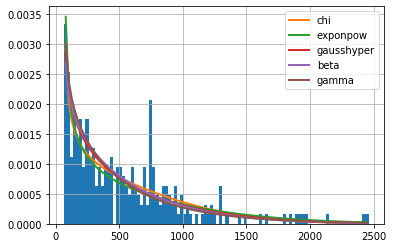

In [36]:
f.summary()

In [37]:
import math
hitters['log_salary'] = hitters.Salary.map(math.log)

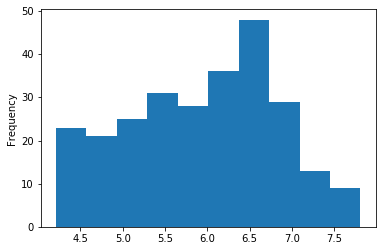

In [39]:
hitters.log_salary.plot.hist()

In [40]:
f = fitter.Fitter(hitters.log_salary)
f.fit()

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:390: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted alpha distribution with error=5.627646536967643)
Fitted anglit distribution with error=5.1666251405083825)
Fitted arcsine distribution with error=10.154377729839993)
Fitted argus distribution with error=5.481692927065651)
Fitted beta distribution with error=5.248138958747858)
Fitted betaprime distribution with error=5.459849917293638)
Fitted bradford distribution with error=6.080921458953876)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted burr distribution with error=5.102024531550381)
Fitted burr12 distribution with error=5.126621354231084)
Fitted cauchy distribution with error=6.1666742084428074)
Fitted chi distribution with error=5.44435162696723)
Fitted chi2 distribution with error=14.476757914833085)
Fitted cosine distribution with error=5.273042542370185)
Fitted crystalball distribution with error=5.414859848730986)
Fitted dgamma distribution with error=5.403722648262608)
Fitted dweibull distribution with error=5.243389603249098)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 128.1.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 115.9.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 117.93333333333331.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 120.98333333333332.
  RuntimeWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\s

Fitted erlang distribution with error=5.462746932032643)
Fitted expon distribution with error=7.929356719369863)
Fitted exponnorm distribution with error=5.414955924434953)
Fitted exponpow distribution with error=5.14606402801626)
Fitted exponweib distribution with error=4.975291189692177)
Fitted f distribution with error=5.431338743868916)
Fitted fatiguelife distribution with error=5.431981030878414)
Fitted fisk distribution with error=5.565305895877791)
Fitted foldcauchy distribution with error=5.719788906493949)
Fitted foldnorm distribution with error=5.199671705742442)
Fitted frechet_l distribution with error=5.176871591340589)
Fitted frechet_r distribution with error=5.292499728649351)
Fitted gamma distribution with error=5.466538238840034)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3175: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=5.941577478161038)
Fitted genexpon distribution with error=6.218945882362617)
Fitted genextreme distribution with error=5.176765848390775)
Fitted gengamma distribution with error=4.9612639687280655)
Fitted genhalflogistic distribution with error=5.064058170630323)
Fitted genlogistic distribution with error=5.348370892671787)
Fitted gennorm distribution with error=5.140402216125373)
Fitted genpareto distribution with error=8.82418893320967)
Fitted gilbrat distribution with error=7.569200833293779)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted gompertz distribution with error=4.936868576511243)
Fitted gumbel_l distribution with error=5.0626141745915625)
Fitted gumbel_r distribution with error=6.048108881092861)
Fitted halfcauchy distribution with error=7.662006531520377)
Fitted halfgennorm distribution with error=5.210853345119583)
Fitted halflogistic distribution with error=6.871791372548229)
Fitted halfnorm distribution with error=6.635392264822573)
Fitted hypsecant distribution with error=5.700706884662224)
Fitted invgamma distribution with error=5.554561223438608)
Fitted invgauss distribution with error=5.6870845578704765)
Fitted invweibull distribution with error=6.04793974565616)
Fitted johnsonsb distribution with error=5.179541303032329)
Fitted johnsonsu distribution with error=5.236799472159816)
Fitted kappa3 distribution with error=5.84547092377798)
Fitted kappa4 distribution with error=6.045836428185979)
Fitted ksone distribution with error=nan)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


Fitted kstwobign distribution with error=6.098187002277651)
Fitted laplace distribution with error=6.237835024779533)
Fitted levy distribution with error=8.880024358079739)
Fitted levy_l distribution with error=8.818785210586338)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=5.257022977878571)
Fitted logistic distribution with error=5.56146973352551)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4299: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted loglaplace distribution with error=6.204085263534889)
Fitted lognorm distribution with error=5.421063407681109)
Fitted lomax distribution with error=6.868916973126478)
Fitted maxwell distribution with error=5.661982985006882)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1618: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1618: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3858: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


Fitted mielke distribution with error=4.87157191768155)
Fitted moyal distribution with error=6.370788463021438)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5014: RuntimeWarning: overflow encountered in double_scalars
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted nakagami distribution with error=5.43674653017333)
Fitted ncf distribution with error=5.678470611623267)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5287: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5289: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5290: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2


Fitted nct distribution with error=5.448194868482144)
Fitted ncx2 distribution with error=6.009333670371639)
Fitted norm distribution with error=5.414859831243233)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3360: RuntimeWarning: invalid value encountered in multiply
  return fac1 * sc.k1e(a * sq) * np.exp(b*x - a*sq) / sq
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3358: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


Fitted norminvgauss distribution with error=5.448993403837947)
Fitted pareto distribution with error=9.087776594946435)
Fitted pearson3 distribution with error=5.191651233068112)
Fitted powerlaw distribution with error=5.863626618200947)
Fitted powerlognorm distribution with error=5.246549260731416)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1618: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


Fitted powernorm distribution with error=5.243710083897636)
Fitted rayleigh distribution with error=5.773861597957976)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5773: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / sc.beta(0.5, c / 2.0)


Fitted rdist distribution with error=10.012824008440848)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2315: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


Fitted recipinvgauss distribution with error=5.706997635263557)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2544: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


Fitted reciprocal distribution with error=13.585523386963716)
Fitted rice distribution with error=5.455960498745687)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=5.226819315331573)
Fitted skewnorm distribution with error=5.103337458516145)
Fitted t distribution with error=5.4147994019921235)
Fitted trapz distribution with error=7.7966369422608395)
Fitted triang distribution with error=5.004775987922961)
Fitted truncexpon distribution with error=6.1656809284586025)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6348: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6348: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncnorm distribution with error=13.585523386963716)


D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6408: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Fitted tukeylambda distribution with error=5.157846976099587)
Fitted uniform distribution with error=5.851391147022199)


KeyboardInterrupt: 

In [ ]:
f.summary()

In [41]:
hitters['League'].unique()

array(['N', 'A'], dtype=object)

In [42]:
hitters['Division'].unique()

array(['W', 'E'], dtype=object)

In [43]:
hitters.NewLeague.unique()

array(['N', 'A'], dtype=object)

In [44]:
hitters['IsNational'] = (hitters.League == 'N') | (hitters.NewLeague == 'N')
hitters['West'] = hitters.Division == 'W'

In [ ]:
# Encode categorical variables as integers.


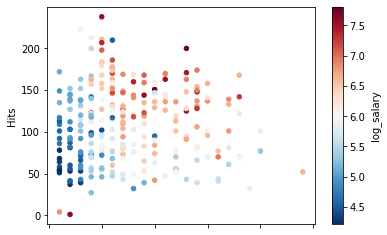

In [50]:
# Create a scatter plot of hits vs years, colored by salary
hitters.plot.scatter(x='Years', y='Hits', c='log_salary', cmap='RdBu_r')

In [ ]:
# Define features: Exclude career statistics (which start with "C") and the response (salary).


In [ ]:
# Define X and y.

In [54]:
feature_cols = ['Hits', 'IsNational', 'Years', 'West', 'HmRun']
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
 hitters[feature_cols], hitters.log_salary
)

In [66]:
rfr = sklearn.ensemble.RandomForestRegressor(
n_estimators=2000, max_features=4)
rfr.fit(Xtrain, Ytrain)
predictions = rfr.predict(Xtest)
math.exp(sklearn.metrics.mean_squared_error(Ytest, predictions))

1.167819137751764

In [68]:
feature_importance = pd.Series(
    index=feature_cols,
    data=rfr.feature_importances_
)
feature_importance

Hits          0.333801
IsNational    0.018216
Years         0.509167
West          0.014408
HmRun         0.124408
dtype: float64

<a id="decision-tree"></a>
## Optional: Predicting Salary With a Decision Tree

Let's first recall how we might predict salary using a single decision tree.

We'll first find the best **max_depth** for a decision tree using cross-validation:

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 21))

# List to store the average RMSE for each value of max_depth:

# Use 10-fold cross-validation with each value of max_depth.


In [ ]:
# Plot max_depth (x-axis) versus RMSE (y-axis).


In [ ]:
# Show the best RMSE and the corresponding max_depth.


In [ ]:
# max_depth=2 was best, so fit a tree using that parameter.


In [ ]:
# Compute feature importances.


<a id="random-forest-demo"></a>
## Predicting Salary With a Random Forest

### Fitting a Random Forest With the Best Parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# max_features=5 is best and n_estimators=150 is sufficiently large.


In [ ]:
# Compute feature importances.


In [ ]:
# Compute the out-of-bag R-squared score.

# Find the average RMSE.


#### Reducing X to its Most Important Features

In [ ]:
# Check the shape of X.

** It important not to select features before separating your train from your test otherwise you are selecting features based on all known observations and introducing more of the information in the test data to the model when you fit it on the training data. **

In [ ]:
# Fit the model on only the train data


In [ ]:
# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

Using the fit model and the features from the train data to transform the test data

In [ ]:
# Create a new feature matrix that only includes important features.


In [ ]:
# Check the RMSE for a random forest that only includes important features.

In this case, the error decreased slightly. Often parameter tuning is required to achieve optimal results.

<a id="comparing"></a>
## Comparing Random Forests With Decision Trees

**Advantages of random forests:**

- Their performance is competitive with the best supervised learning methods.
- They provide a more reliable estimate of feature importance.
- They allow you to estimate out-of-sample error without using train/test split or cross-validation.

**Disadvantages of random forests:**

- They are less interpretable.
- They are slower to train.
- They are slower to predict.

![Machine learning flowchart](assets/driver_ensembling.png)

*Machine learning flowchart created by the [second-place finisher](http://blog.kaggle.com/2015/04/20/axa-winners-interview-learning-telematic-fingerprints-from-gps-data/) of Kaggle's [Driver Telematics competition](https://www.kaggle.com/c/axa-driver-telematics-analysis)*.

<a id="tuning"></a>
## Optional: Tuning Individual Parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor


### Tuning n_estimators

One important tuning parameter is **n_estimators**, which represents the number of trees that should be grown. This should be a large enough value that the error seems to have "stabilized."

In [ ]:
# List of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).


In [ ]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).



_** In theory, the RMSE will continue to decrease and eventually level out.  Adding more estimators will neither (noticably)increase or decrease the RMSE (or other loss metric). However, introduction of noise can lead to random spikes as the n_estimators changes. This example is particularly interesting as after about 120 estimators the RMSE seems to steadily rise as more estimators are added.**_

### Tuning max_features

The other important tuning parameter is **max_features**, which represents the number of features that should be considered at each split.

In [ ]:
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).


In [ ]:
# Plot max_features (x-axis) versus RMSE (y-axis).



In [ ]:
# Show the best RMSE and the corresponding max_features.


<a id="summary"></a>
## Summary

**Which model is best?** The best classifier for a particular task is task-dependent. In many business cases, interpretability is more important than accuracy. So, decision trees may be preferred. In other cases, accuracy on unseen data might be paramount, in which case random forests would likely be better (since they typically overfit less). 

Remember that every model is a tradeoff between bias and variance. Ensemble models attempt to reduce overfitting by reducing variance but increasing bias (as compared to decision trees). By making the model more stable, we necessarily make it fit the training data less accurately. In some cases this is desired (particularly if we start with lots of overfitting), but for more simply structured data a simple decision tree might be best.

---

**In this lesson:**

- We looked at ensemble models.

- We saw how decision trees could be extended using two ensemble techniques -- bagging and random forests.

- We looked at methods of evaluating feature importance and tuning parameters.